In [1]:
import numpy as np 
import pandas as pd

In [2]:
dataset =pd.read_csv(r"layoffs_data.csv")

In [3]:
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,https://economictimes.indiatimes.com/tech/news...,382.0,Unknown,2023-04-06 03:11:10,India,Unknown
1,Amplitude,SF Bay Area,Data,99.0,0.13,2023-04-05,https://amplitude.com/blog/team-update,311.0,Post-IPO,2023-04-05 18:14:10,United States,Unknown
2,1K Kirana,Gurugram,Retail,600.0,0.40,2023-04-04,https://www.moneycontrol.com/news/business/sta...,NaN,Series B,2023-04-04 09:45:37,India,Unknown
3,Boost,New York City,Finance,15.0,0.20,2023-04-04,https://boostinsurance.com/blog/a-message-from...,37.0,Series B,2023-04-05 00:23:08,United States,Unknown
4,Cin7,Auckland,Retail,NaN,NaN,2023-04-04,https://www.nzherald.co.nz/business/post-pande...,NaN,Private Equity,2023-04-05 16:25:17,New Zealand,Unknown


# Preprocessing the data:

# Removing unnecessary columns:

In [4]:
dataset = dataset.drop(['Source','List_of_Employees_Laid_Off','Date_Added'],axis=1)
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,382.0,Unknown,India
1,Amplitude,SF Bay Area,Data,99.0,0.13,2023-04-05,311.0,Post-IPO,United States
2,1K Kirana,Gurugram,Retail,600.0,0.40,2023-04-04,NaN,Series B,India
3,Boost,New York City,Finance,15.0,0.20,2023-04-04,37.0,Series B,United States
4,Cin7,Auckland,Retail,NaN,NaN,2023-04-04,NaN,Private Equity,New Zealand


# Filling missing values:

In [5]:
# first we'll list down the columns that contain missing values:

In [6]:
# creating a boolean mask indicating which values are missing:
mask = dataset.isna()
# use the any() method to check which columns have at least one missing value:
columns_with_missing_value = mask.any()
print(columns_with_missing_value)

Company           False
Location_HQ       False
Industry          False
Laid_Off_Count     True
Percentage         True
Date               True
Funds_Raised       True
Stage             False
Country           False
dtype: bool


In [7]:
# Now we'll be filling the missing values accordingly(according to the column):

In [8]:
dataset['Laid_Off_Count'] = dataset['Laid_Off_Count'].fillna(dataset['Laid_Off_Count'].mean())
dataset['Percentage'] = dataset['Percentage'].fillna(dataset['Percentage'].mean())
dataset['Funds_Raised'] = dataset['Funds_Raised'].fillna(dataset['Funds_Raised'].mean())
# To fill the Date column missing values we'll first convert the date column to datetime object and then 'fill' missing
# values in 'date' column with previous value:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].fillna(method='ffill')
                                                             

In [9]:
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Dunzo,Bengaluru,Food,300.000000,0.300000,2023-04-05,382.000000,Unknown,India
1,Amplitude,SF Bay Area,Data,99.000000,0.130000,2023-04-05,311.000000,Post-IPO,United States
2,1K Kirana,Gurugram,Retail,600.000000,0.400000,2023-04-04,823.746888,Series B,India
3,Boost,New York City,Finance,15.000000,0.200000,2023-04-04,37.000000,Series B,United States
4,Cin7,Auckland,Retail,254.399408,0.257984,2023-04-04,823.746888,Private Equity,New Zealand


# Now to do the recession analysis,a more accurate measure woud be percentage of people laid off than laid_off_count itself.To see how different features impact the percentage of people laid off,we'll have to find the number of people laid off for particular industry,location etc.

In [10]:
industry_laid_off_counts = dataset.groupby('Industry')['Laid_Off_Count'].sum()
industry_laid_off_counts = industry_laid_off_counts.sort_values(ascending=False)
print(industry_laid_off_counts)

Industry
Retail            70854.760355
Consumer          65045.979290
Finance           53048.346154
Other             50747.769231
Transportation    46659.976331
Healthcare        43636.961538
Food              37501.772189
Real Estate       29012.973373
Hardware          26988.795858
Travel            22246.988166
Crypto            21452.775148
Education         20846.582840
Marketing         20319.576923
Sales             13979.198225
Data              13595.381657
Media             13575.381657
HR                12303.384615
Fitness           11441.994083
Infrastructure    11127.387574
Security          10558.189349
Logistics          7078.792899
Support            6830.192308
Construction       5134.997041
Recruiting         4061.997041
Product            4031.393491
Energy             2328.396450
Legal              1599.198225
Aerospace          1169.798817
Manufacturing       382.399408
Unknown             296.399408
Name: Laid_Off_Count, dtype: float64


In [11]:
location_laid_off_counts = dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()
location_laid_off_counts = location_laid_off_counts.sort_values(ascending=False)
print(location_laid_off_counts)

Location_HQ
SF Bay Area      190592.488166
Seattle           52312.180473
New York City     49802.952663
Bengaluru         25565.192308
Boston            20946.576923
                     ...      
Cork                 21.000000
Kiel                 21.000000
Kansas City          20.000000
Gydnia               13.000000
Indianapolis          5.000000
Name: Laid_Off_Count, Length: 202, dtype: float64


In [12]:
country_laid_off_counts = dataset.groupby('Country')['Laid_Off_Count'].sum()
country_laid_off_counts = country_laid_off_counts.sort_values(ascending=False)
print(country_laid_off_counts)

Country
United States           432889.680473
India                    43569.585799
Netherlands              18237.597633
United Kingdom           16265.582840
Brazil                   12934.994083
Sweden                   12296.597633
Germany                  12076.192308
Canada                   11726.988166
Australia                 9232.784024
Singapore                 9047.792899
China                     8394.594675
Indonesia                 7119.393491
Israel                    6181.994083
Nigeria                   3408.396450
New Zealand               1887.597633
France                    1688.198225
United Arab Emirates      1503.798817
Hong Kong                 1238.798817
Finland                   1013.198225
Austria                    894.399408
Colombia                   893.198225
Switzerland                870.798817
Kenya                      857.798817
Spain                      847.798817
Seychelles                 838.198225
Pakistan                   763.198225
Viet

# Now let's visualize the obtained result via donut charts:

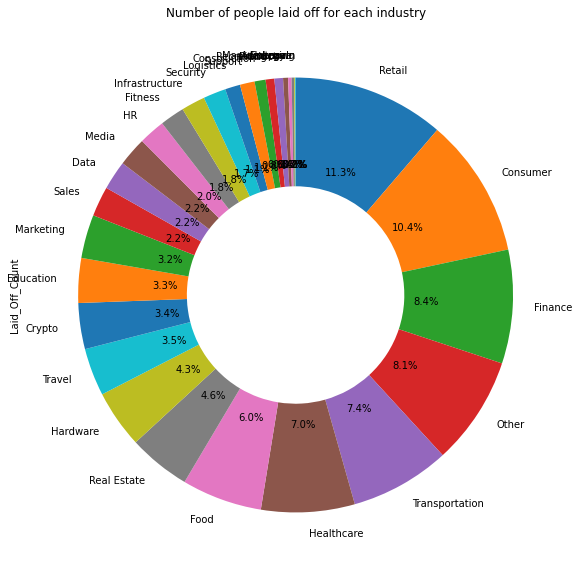

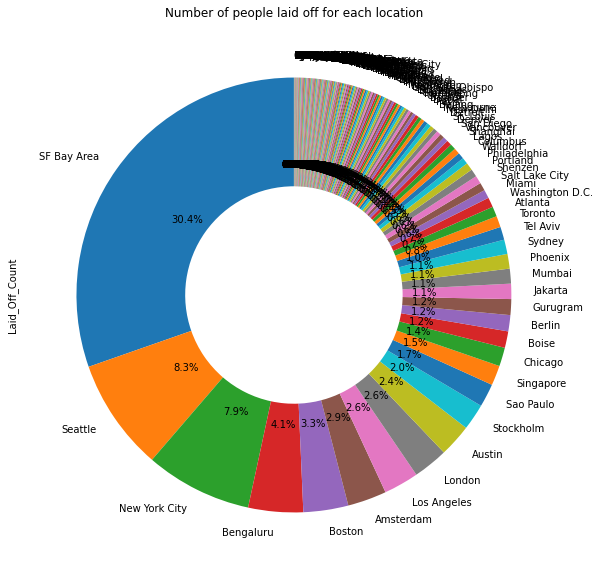

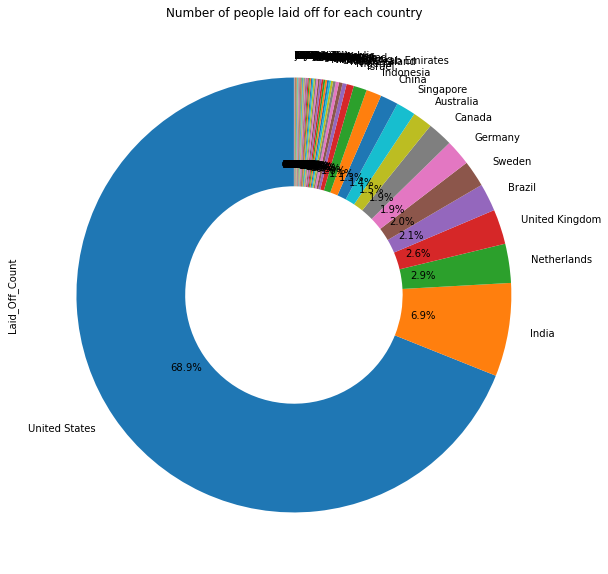

In [13]:
import matplotlib.pyplot as plt
# split industries into groups
# groups = [dataset['Industry'][i:i+10] for i in range(0, len(dataset['Industry']), 10)]
# # create a donut chart for each group of industries
# for i, group in enumerate(groups):
#     # get data for the current group of industries
#     data = dataset[dataset['Industry'].isin(group)]
#     values = dataset['Laid_Off_Count']
#     labels = dataset['Industry']
    
#     # create a donut chart
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.pie(values, labels=labels, wedgeprops={'width': 0.5})
#     ax.set_title(f'Laid Off Count for Industries {i*10}-{i*10+len(group)-1}')
    
#     plt.show()


industry_laid_off_counts.plot(kind='pie',subplots=True,figsize=(10,10),autopct='%1.1f%%',startangle=90,counterclock=False,legend=False,stacked=True,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each industry')
plt.show()
location_laid_off_counts.plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',startangle=90,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each location')
plt.show()
country_laid_off_counts.plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',startangle=90,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each country')
plt.show()

# Now let's do analysis of laid off count by country.We see that a majority of people have been laid off in America followed by India,Netherlands etc.We'll be seeing the factors affecting the lay off in top 5 five countries with most layoffs:

In [14]:
country_laid_off_counts_top_five = country_laid_off_counts[:5]

In [15]:
country_laid_off_counts_top_five

Country
United States     432889.680473
India              43569.585799
Netherlands        18237.597633
United Kingdom     16265.582840
Brazil             12934.994083
Name: Laid_Off_Count, dtype: float64

# In our original dataset we have the lay off count as well as the percentage(i.e the people who have been laid off account to what percentage of total number of employees in the company).We'll use these two informations to find total number of people in the organization.Then we'll be utilizing this information to calculate the total number of people across different industries in the top five countries that have been worstly affected by layoff and will find out what percentage of people have suffered from every industry in these countries.

In [16]:
# finding total number of people in each organization :
employee_count = (dataset['Laid_Off_Count'] * 100)/dataset['Percentage']
employee_count
dataset_copy = dataset
dataset_copy['employee_count']= employee_count
dataset_copy

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count
0,Dunzo,Bengaluru,Food,300.000000,0.300000,2023-04-05,382.000000,Unknown,India,100000.000000
1,Amplitude,SF Bay Area,Data,99.000000,0.130000,2023-04-05,311.000000,Post-IPO,United States,76153.846154
2,1K Kirana,Gurugram,Retail,600.000000,0.400000,2023-04-04,823.746888,Series B,India,150000.000000
3,Boost,New York City,Finance,15.000000,0.200000,2023-04-04,37.000000,Series B,United States,7500.000000
4,Cin7,Auckland,Retail,254.399408,0.257984,2023-04-04,823.746888,Private Equity,New Zealand,98610.605337
...,...,...,...,...,...,...,...,...,...,...
2463,HopSkipDrive,Los Angeles,Transportation,8.000000,0.100000,2020-03-13,45.000000,Unknown,United States,8000.000000
2464,Panda Squad,SF Bay Area,Consumer,6.000000,0.750000,2020-03-13,1.000000,Seed,United States,800.000000
2465,Tamara Mellon,Los Angeles,Retail,20.000000,0.400000,2020-03-12,90.000000,Series C,United States,5000.000000
2466,EasyPost,Salt Lake City,Logistics,75.000000,0.257984,2020-03-11,12.000000,Series A,United States,29071.590418


# Grouping data on the basis of industry to find the total employee count and laid off count for every industry in order to find the total percentage of people laid off in every industry for the five top countries which have been worstly affected by layoffs:

In [17]:
# extracting information regarding the top five worstly affected countries and storing them in separate dataframes:

USA_dataset = dataset_copy[dataset_copy['Country']=='United States']
India_dataset = dataset_copy[dataset_copy['Country']=='India']
Netherlands_dataset = dataset_copy[dataset_copy['Country']=='Netherlands']
United_Kingdom_dataset = dataset_copy[dataset_copy['Country']=='United Kingdom']
Brazil_dataset = dataset_copy[dataset_copy['Country']=='Brazil']

# For USA:

In [18]:
# finding employee and layoff count (industry wise) in USA:

employee_count_by_industry_USA = USA_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_USA = USA_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [19]:
# Sorting employee count (industry wise) for USA in descending order:
employee_count_by_industry_USA = employee_count_by_industry_USA.sort_values(ascending=False)
employee_count_by_industry_USA

Industry
Retail            9.410087e+07
Hardware          5.042890e+07
Consumer          4.299713e+07
Other             3.578691e+07
Sales             2.654171e+07
Transportation    2.111560e+07
Finance           2.031280e+07
Healthcare        1.598476e+07
Real Estate       1.270257e+07
Infrastructure    1.193335e+07
Marketing         1.192213e+07
Food              1.124126e+07
Data              9.589730e+06
Media             8.191273e+06
HR                7.632963e+06
Security          7.164272e+06
Logistics         5.735030e+06
Crypto            5.712868e+06
Fitness           4.918478e+06
Travel            3.864673e+06
Education         2.755307e+06
Recruiting        2.683033e+06
Product           2.460729e+06
Construction      2.041233e+06
Legal             9.445456e+05
Energy            5.494390e+05
Aerospace         3.107437e+05
Manufacturing     1.804737e+05
Unknown           1.695996e+05
Support                    NaN
Name: employee_count, dtype: float64

In [20]:
# Sorting layoff count (industry wise) for USA in descending order:
laid_off_count_by_industry_USA = laid_off_count_by_industry_USA.sort_values(ascending=False)
laid_off_count_by_industry_USA

Industry
Consumer          54711.186391
Retail            54174.573964
Other             30439.778107
Healthcare        29125.565089
Finance           28326.573964
Transportation    27827.786982
Hardware          25354.396450
Real Estate       24758.576923
Food              17779.387574
Marketing         14129.781065
Sales             13619.198225
Crypto            11478.985207
Data              11080.186391
HR                10278.786982
Infrastructure    10184.189349
Media              9449.186391
Travel             9439.393491
Fitness            9395.594675
Security           8801.591716
Education          6142.390533
Support            5945.792899
Logistics          4649.594675
Construction       3838.798817
Recruiting         3836.997041
Product            3766.393491
Legal              1569.198225
Energy             1430.198225
Aerospace           718.798817
Manufacturing       382.399408
Unknown             254.399408
Name: Laid_Off_Count, dtype: float64

In [21]:
# finding the layoff percentage for every industry in USA and sorting it in descending order:
industry_wise_layoff_percentage_USA = ((laid_off_count_by_industry_USA)/(employee_count_by_industry_USA))*100
industry_wise_layoff_percentage_USA = industry_wise_layoff_percentage_USA.sort_values(ascending=False)
industry_wise_layoff_percentage_USA

Industry
Energy            0.260302
Travel            0.244248
Aerospace         0.231316
Education         0.222929
Manufacturing     0.211887
Crypto            0.200932
Real Estate       0.194910
Fitness           0.191026
Construction      0.188063
Healthcare        0.182208
Legal             0.166133
Food              0.158162
Product           0.153060
Unknown           0.150000
Recruiting        0.143010
Finance           0.139452
HR                0.134663
Transportation    0.131788
Consumer          0.127244
Security          0.122854
Marketing         0.118517
Data              0.115542
Media             0.115357
Infrastructure    0.085342
Other             0.085058
Logistics         0.081074
Retail            0.057571
Sales             0.051312
Hardware          0.050278
Support                NaN
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in USA:

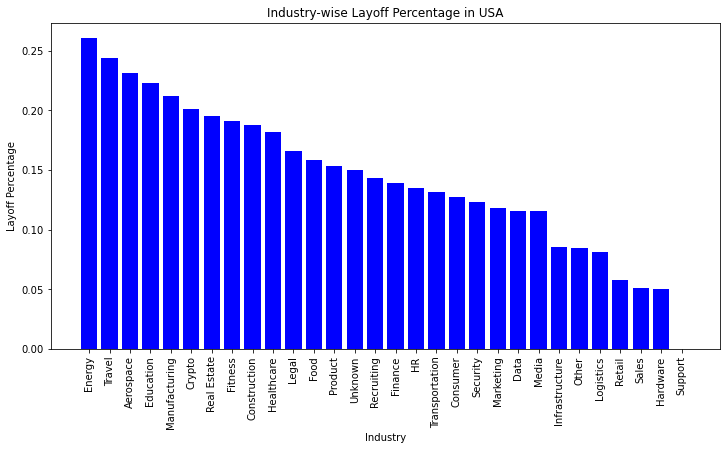

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Energy', 'Travel', 'Aerospace', 'Education', 'Manufacturing',
                 'Crypto', 'Real Estate', 'Fitness', 'Construction', 'Healthcare',
                 'Legal', 'Food', 'Product', 'Unknown', 'Recruiting', 'Finance',
                 'HR', 'Transportation', 'Consumer', 'Security', 'Marketing', 'Data',
                 'Media', 'Infrastructure', 'Other', 'Logistics', 'Retail', 'Sales',
                 'Hardware', 'Support'],
    'Layoff Percentage': [0.260302, 0.244248, 0.231316, 0.222929, 0.211887,
                          0.200932, 0.194910, 0.191026, 0.188063, 0.182208,
                          0.166133, 0.158162, 0.153060, 0.150000, 0.143010, 0.139452,
                          0.134663, 0.131788, 0.127244, 0.122854, 0.118517, 0.115542,
                          0.115357, 0.085342, 0.085058, 0.081074, 0.057571, 0.051312,
                          0.050278, 0]
}

industry_wise_layoff_percentage = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in USA')
plt.show()


# For India:

In [23]:
# finding employee and layoff count (industry wise) in India:

employee_count_by_industry_India = India_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_India = India_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [24]:
# Sorting employee count (industry wise) for India in descending order:
employee_count_by_industry_India = employee_count_by_industry_India.sort_values(ascending=False)
employee_count_by_industry_India

Industry
Education         1.042452e+07
Food              6.987105e+06
Retail            2.692818e+06
Transportation    2.687127e+06
Travel            1.451280e+06
Consumer          1.280823e+06
Finance           1.135888e+06
Healthcare        8.264095e+05
Fitness           6.319305e+05
Media             3.454399e+05
Logistics         2.500105e+05
Marketing         1.866864e+05
Other             1.829530e+05
Real Estate       1.469053e+05
Support           1.392431e+05
Crypto            1.214496e+05
HR                5.100970e+04
Recruiting        5.000000e+04
Construction      2.800000e+04
Data              1.550485e+04
Name: employee_count, dtype: float64

In [25]:
# Sorting layoff count (industry wise) for India in descending order:
laid_off_count_by_industry_India = laid_off_count_by_industry_India.sort_values(ascending=False)
laid_off_count_by_industry_India

Industry
Education         11939.795858
Food               5482.597633
Transportation     5278.798817
Retail             4772.597633
Finance            3575.399408
Consumer           2950.000000
Travel             2754.399408
Healthcare         2019.198225
Fitness            1100.000000
Logistics           680.000000
Other               500.000000
Crypto              494.399408
Marketing           461.000000
Media               454.399408
Real Estate         350.000000
Support             257.000000
Recruiting          200.000000
Construction        140.000000
HR                  120.000000
Data                 40.000000
Name: Laid_Off_Count, dtype: float64

In [26]:
# finding the layoff percentage for every industry in India and sorting it in descending order:
industry_wise_layoff_percentage_India = ((laid_off_count_by_industry_India)/(employee_count_by_industry_India))*100
industry_wise_layoff_percentage_India = industry_wise_layoff_percentage_India.sort_values(ascending=False)
industry_wise_layoff_percentage_India

Industry
Construction      0.500000
Crypto            0.407082
Recruiting        0.400000
Finance           0.314767
Other             0.273294
Logistics         0.271989
Data              0.257984
Marketing         0.246938
Healthcare        0.244334
Real Estate       0.238249
HR                0.235249
Consumer          0.230321
Transportation    0.196448
Travel            0.189791
Support           0.184569
Retail            0.177234
Fitness           0.174070
Media             0.131542
Education         0.114536
Food              0.078467
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in India:

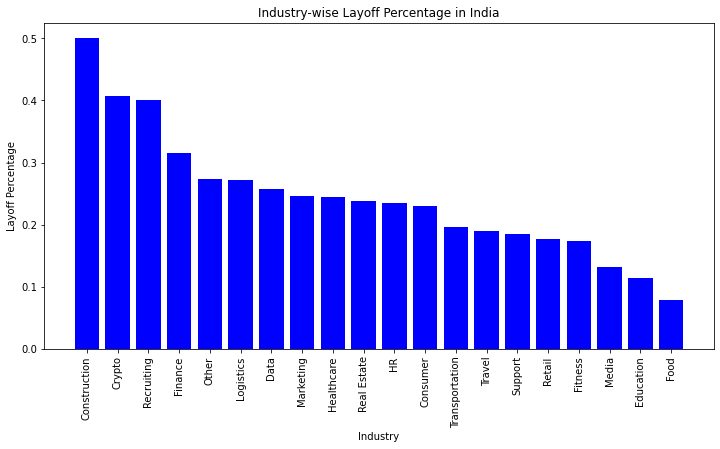

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Industry': ['Construction', 'Crypto', 'Recruiting', 'Finance', 'Other',
                 'Logistics', 'Data', 'Marketing', 'Healthcare', 'Real Estate',
                 'HR', 'Consumer', 'Transportation', 'Travel', 'Support',
                 'Retail', 'Fitness', 'Media', 'Education', 'Food'],
    'Layoff Percentage': [0.500000, 0.407082, 0.400000, 0.314767, 0.273294,
                          0.271989, 0.257984, 0.246938, 0.244334, 0.238249,
                          0.235249, 0.230321, 0.196448, 0.189791, 0.184569,
                          0.177234, 0.174070, 0.131542, 0.114536, 0.078467]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(12, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in India')
plt.show()


# For Netherlands:

In [28]:
# finding employee and layoff count (industry wise) in Netherlands:

employee_count_by_industry_Netherlands = Netherlands_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_Netherlands = Netherlands_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [29]:
# Sorting employee count (industry wise) for Netherlands in descending order:
employee_count_by_industry_Netherlands = employee_count_by_industry_Netherlands.sort_values(ascending=False)
employee_count_by_industry_Netherlands

Industry
Healthcare        1.261538e+07
Travel            1.750000e+06
Marketing         1.000000e+06
Transportation    5.900000e+05
Finance           4.546104e+05
Other             1.978738e+05
Food              1.511723e+05
Name: employee_count, dtype: float64

In [30]:
# Sorting layoff count (industry wise) for Netherlands in descending order:
laid_off_count_by_industry_Netherlands = laid_off_count_by_industry_Netherlands.sort_values(ascending=False)
laid_off_count_by_industry_Netherlands

Industry
Healthcare        10000.000000
Travel             4375.000000
Marketing          1500.000000
Transportation      725.000000
Finance             658.798817
Other               588.798817
Food                390.000000
Name: Laid_Off_Count, dtype: float64

In [31]:
# finding the layoff percentage for every industry in Netherlands and sorting it in descending order:
industry_wise_layoff_percentage_Netherlands = ((laid_off_count_by_industry_Netherlands)/(employee_count_by_industry_Netherlands))*100
industry_wise_layoff_percentage_Netherlands = industry_wise_layoff_percentage_Netherlands.sort_values(ascending=False)
industry_wise_layoff_percentage_Netherlands

Industry
Other             0.297563
Food              0.257984
Travel            0.250000
Marketing         0.150000
Finance           0.144915
Transportation    0.122881
Healthcare        0.079268
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in Netherlands:

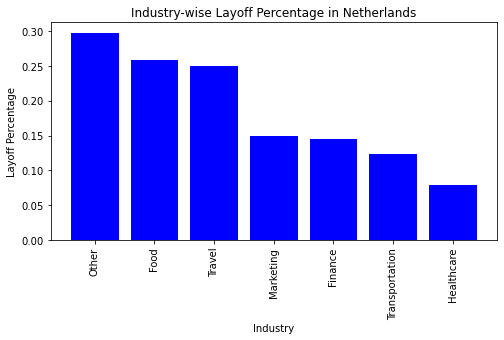

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Other', 'Food', 'Travel', 'Marketing', 'Finance', 'Transportation', 'Healthcare'],
    'Layoff Percentage': [0.297563, 0.257984, 0.250000, 0.150000, 0.144915, 0.122881, 0.079268]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(8, 4))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in Netherlands')
plt.show()


# For United Kingdom:

In [33]:
# finding employee and layoff count (industry wise) in United Kingdom:

employee_count_by_industry_United_Kingdom = United_Kingdom_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_United_Kingdom = United_Kingdom_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [34]:
# Sorting employee count (industry wise) for United Kingdom in descending order:
employee_count_by_industry_United_Kingdom = employee_count_by_industry_United_Kingdom.sort_values(ascending=False)
employee_count_by_industry_United_Kingdom

Industry
Food              1.827235e+06
Transportation    1.643326e+06
Finance           1.495233e+06
Other             7.557046e+05
HR                3.952766e+05
Crypto            3.915596e+05
Media             3.527172e+05
Travel            2.995787e+05
Consumer          2.612410e+05
Security          2.332381e+05
Data              2.049736e+05
Retail            9.868555e+04
Education         9.861061e+04
Energy            9.861061e+04
Real Estate       9.690530e+04
Marketing         7.043994e+04
Aerospace         5.305882e+04
Healthcare        3.976212e+04
Product           1.000000e+03
Name: employee_count, dtype: float64

In [35]:
# Sorting layoff count (industry wise) for United Kingdom in descending order:
laid_off_count_by_industry_United_Kingdom = laid_off_count_by_industry_United_Kingdom.sort_values(ascending=False)
laid_off_count_by_industry_United_Kingdom

Industry
Transportation    3690.597633
Food              3180.198225
Finance           2369.795858
Other             1259.597633
Crypto            1114.798817
Travel             749.000000
Media              619.399408
HR                 536.798817
Data               528.798817
Aerospace          451.000000
Retail             334.399408
Marketing          292.399408
Energy             254.399408
Education          254.399408
Real Estate        250.000000
Security           183.000000
Healthcare         108.000000
Consumer            79.000000
Product             10.000000
Name: Laid_Off_Count, dtype: float64

In [36]:
# finding the layoff percentage for every industry in United Kingdom and sorting it in descending order:
industry_wise_layoff_percentage_United_Kingdom = ((laid_off_count_by_industry_United_Kingdom)/(employee_count_by_industry_United_Kingdom))*100
industry_wise_layoff_percentage_United_Kingdom = industry_wise_layoff_percentage_United_Kingdom.sort_values(ascending=False)
industry_wise_layoff_percentage_United_Kingdom

Industry
Product           1.000000
Aerospace         0.850000
Marketing         0.415105
Retail            0.338853
Crypto            0.284707
Healthcare        0.271615
Energy            0.257984
Education         0.257984
Real Estate       0.257984
Data              0.257984
Travel            0.250018
Transportation    0.224581
Media             0.175608
Food              0.174044
Other             0.166679
Finance           0.158490
HR                0.135803
Security          0.078461
Consumer          0.030240
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in United Kingdom:

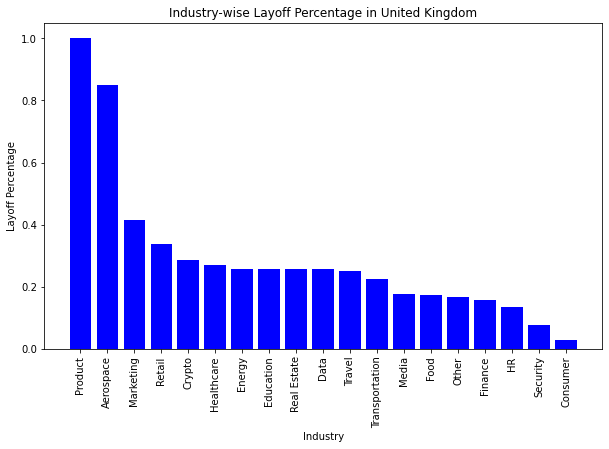

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Product', 'Aerospace', 'Marketing', 'Retail', 'Crypto', 'Healthcare', 'Energy', 'Education', 
                 'Real Estate', 'Data', 'Travel', 'Transportation', 'Media', 'Food', 'Other', 'Finance', 'HR', 
                 'Security', 'Consumer'],
    'Layoff Percentage': [1.000000, 0.850000, 0.415105, 0.338853, 0.284707, 0.271615, 0.257984, 0.257984, 
                          0.257984, 0.257984, 0.250018, 0.224581, 0.175608, 0.174044, 0.166679, 0.158490, 
                          0.135803, 0.078461, 0.030240]
}
industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(10, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in United Kingdom')
plt.show()


# For Brazil:

In [38]:
# finding employee and layoff count (industry wise) in Brazil:

employee_count_by_industry_Brazil = Brazil_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_Brazil = Brazil_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [39]:
# Sorting employee count (industry wise) for Brazil in descending order:
employee_count_by_industry_Brazil = employee_count_by_industry_Brazil.sort_values(ascending=False)
employee_count_by_industry_Brazil

Industry
Finance           3.955524e+06
Real Estate       1.443517e+06
Retail            7.690593e+05
Logistics         7.619048e+05
Food              7.436100e+05
Transportation    6.083444e+05
Other             2.451220e+05
Marketing         2.391667e+05
Travel            2.335725e+05
Consumer          1.948762e+05
Healthcare        1.750451e+05
Crypto            1.416667e+05
Fitness           1.415152e+05
Education         8.740000e+04
Support           1.320000e+04
Sales             1.275000e+04
Recruiting        1.125000e+04
HR                3.876212e+03
Name: employee_count, dtype: float64

In [40]:
# Sorting layoff count (industry wise) for Brazil in descending order:
laid_off_count_by_industry_Brazil = laid_off_count_by_industry_Brazil.sort_values(ascending=False)
laid_off_count_by_industry_Brazil

Industry
Finance           5085.795858
Real Estate       1537.000000
Retail            1248.798817
Logistics          800.000000
Transportation     699.399408
Food               675.000000
Travel             667.000000
Fitness            467.000000
Consumer           381.000000
Marketing          327.000000
Healthcare         311.000000
Other              243.000000
Education          191.000000
Crypto             190.000000
Sales               51.000000
Support             33.000000
Recruiting          18.000000
HR                  10.000000
Name: Laid_Off_Count, dtype: float64

In [41]:
# finding the layoff percentage for every industry in Brazil and sorting it in descending order:
industry_wise_layoff_percentage_Brazil = ((laid_off_count_by_industry_Brazil)/(employee_count_by_industry_Brazil))*100
industry_wise_layoff_percentage_Brazil = industry_wise_layoff_percentage_Brazil.sort_values(ascending=False)
industry_wise_layoff_percentage_Brazil

Industry
Sales             0.400000
Fitness           0.330000
Travel            0.285564
HR                0.257984
Support           0.250000
Education         0.218535
Consumer          0.195509
Healthcare        0.177668
Retail            0.162380
Recruiting        0.160000
Marketing         0.136725
Crypto            0.134118
Finance           0.128575
Transportation    0.114968
Real Estate       0.106476
Logistics         0.105000
Other             0.099134
Food              0.090773
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in Brazil:

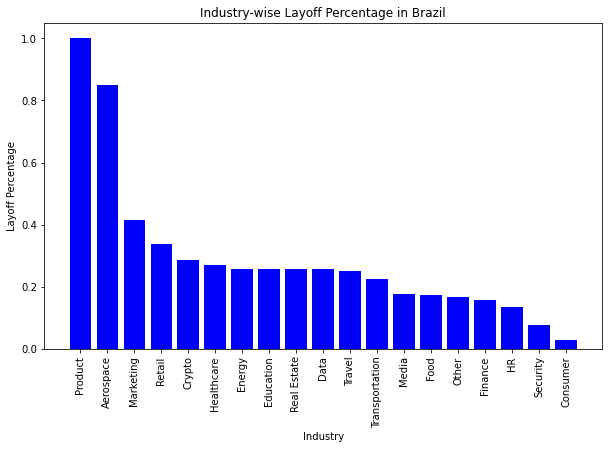

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Product', 'Aerospace', 'Marketing', 'Retail', 'Crypto', 'Healthcare', 'Energy', 'Education', 
                 'Real Estate', 'Data', 'Travel', 'Transportation', 'Media', 'Food', 'Other', 'Finance', 'HR', 
                 'Security', 'Consumer'],
    'Layoff Percentage': [1.000000, 0.850000, 0.415105, 0.338853, 0.284707, 0.271615, 0.257984, 0.257984, 
                          0.257984, 0.257984, 0.250018, 0.224581, 0.175608, 0.174044, 0.166679, 0.158490, 
                          0.135803, 0.078461, 0.030240]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(10, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in Brazil')
plt.show()


# Since we have performed analysis on the basis of industry in the worstly affected countries, now we'll be analyzing the data based on the location headquarters for companies belonging to the worstly affected countries.For this, we'll be grouping data on basis of location headquarters and see the employee count and layoff count there to calculate layoff percentage to find out what effect does deciding the headquarter location have on layoffs:

# For USA:

In [43]:
# finding employee and layoff count (headquarter location wise) in USA:

employee_count_by_location_USA = USA_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_USA = USA_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [44]:
# Sorting employee count (headquarter location wise) for USA based companies in descending order:
employee_count_by_location_USA = employee_count_by_location_USA.sort_values(ascending=False)
employee_count_by_location_USA

Location_HQ
SF Bay Area      1.709702e+08
Seattle          1.088726e+08
New York City    4.533373e+07
Austin           1.908742e+07
Boston           1.325334e+07
                     ...     
Orlando          9.302909e+03
New Delhi        5.039076e+03
Indianapolis     3.333333e+03
Toronto          2.000000e+03
Los Angeles               NaN
Name: employee_count, Length: 96, dtype: float64

In [45]:
# Sorting layoff count (headquarter location wise) for USA based companies in descending order:
laid_off_count_by_location_USA = laid_off_count_by_location_USA.sort_values(ascending=False)
laid_off_count_by_location_USA

Location_HQ
SF Bay Area      190562.488166
Seattle           52312.180473
New York City     49802.952663
Boston            20946.576923
Los Angeles       16332.177515
                     ...      
Orlando              24.000000
Kansas City          20.000000
New Delhi            13.000000
Toronto               5.000000
Indianapolis          5.000000
Name: Laid_Off_Count, Length: 96, dtype: float64

In [46]:
# finding the layoff percentage for every headquarter location for USA based companies and sorting it in descending order:
location_wise_layoff_percentage_USA = ((laid_off_count_by_location_USA)/(employee_count_by_location_USA))*100
location_wise_layoff_percentage_USA = location_wise_layoff_percentage_USA.sort_values(ascending=False)
location_wise_layoff_percentage_USA

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
                  ...   
Boise           0.078117
St. Louis       0.070178
Seattle         0.048049
Kansas City     0.020000
Los Angeles          NaN
Length: 96, dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for USA based companies.Since we have too many locations, in order to properly visualize the data, we'll be plotting the bar graph for top 10 and bottom 10 locations according to layoff percentage:

In [47]:
# extracting top 10 locations in a separate dataset:
location_wise_layoff_percentage_USA_top_10 = location_wise_layoff_percentage_USA[:10]
location_wise_layoff_percentage_USA_top_10

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
Nashville       0.603039
Grand Rapids    0.424973
Mexico City     0.409368
Tokyo           0.400000
Tampa Bay       0.400000
dtype: float64

In [48]:
# extracting bottom 10 locations in a separate dataset:
location_wise_layoff_percentage_USA_bottom_10 = location_wise_layoff_percentage_USA[86:]
location_wise_layoff_percentage_USA_bottom_10

Location_HQ
Oxford          0.100000
Philadelphia    0.088874
Baltimore       0.082895
Detroit         0.080551
Austin          0.079997
Boise           0.078117
St. Louis       0.070178
Seattle         0.048049
Kansas City     0.020000
Los Angeles          NaN
dtype: float64

# Creating a line graph for the 10 worstly affected headquarter locations:

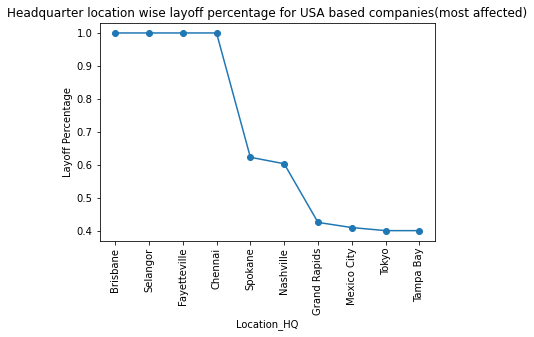

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Brisbane', 'Selangor', 'Fayetteville', 'Chennai', 'Spokane', 'Nashville', 'Grand Rapids', 'Mexico City', 'Tokyo', 'Tampa Bay'], 
        'Layoff_Percentage': [1.0, 1.0, 1.0, 1.0, 0.622708, 0.603039, 0.424973, 0.409368, 0.4, 0.4]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for USA based companies(most affected)')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# Creating a line graph for the 10 least affected headquarter locations:

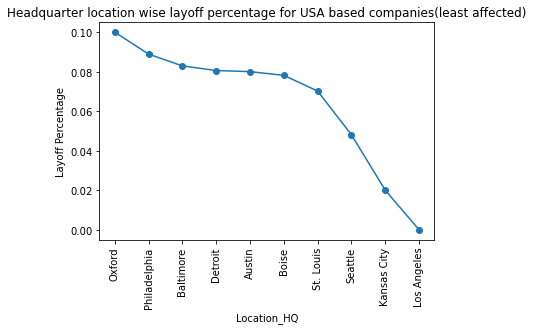

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Oxford', 'Philadelphia', 'Baltimore', 'Detroit', 'Austin', 'Boise', 'St. Louis', 'Seattle', 'Kansas City', 'Los Angeles'], 
        'Layoff_Percentage': [0.1, 0.088874, 0.082895, 0.080551, 0.079997, 0.078117, 0.070178, 0.048049, 0.02, 0]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for USA based companies(least affected)')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()

# For India:

In [51]:
# finding employee and layoff count (headquarter location wise) in India:

employee_count_by_location_India = India_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_India = India_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [52]:
# Sorting employee count (headquarter location wise) for Indian based companies in descending order:
employee_count_by_location_India = employee_count_by_location_India.sort_values(ascending=False)
employee_count_by_location_India

Location_HQ
Bengaluru    2.009731e+07
Mumbai       3.926534e+06
Gurugram     3.721767e+06
New Delhi    9.567250e+05
Patna        5.087988e+05
Noida        1.223452e+05
Ahmedabad    1.000000e+05
Hyderabad    9.861061e+04
Chennai      4.666667e+04
Indore       2.907159e+04
Pune         2.727273e+04
Name: employee_count, dtype: float64

In [53]:
# Sorting layoff count (headquarter location wise) for Indian based companies in descending order:
laid_off_count_by_location_India = laid_off_count_by_location_India.sort_values(ascending=False)
laid_off_count_by_location_India

Location_HQ
Bengaluru    25565.192308
Gurugram      7393.597633
Mumbai        6932.597633
New Delhi     1910.000000
Noida          504.399408
Ahmedabad      500.000000
Hyderabad      254.399408
Patna          254.399408
Chennai        150.000000
Indore          75.000000
Pune            30.000000
Name: Laid_Off_Count, dtype: float64

In [54]:
# finding the layoff percentage for every headquarter location for Indian based companies and sorting it in descending order:
location_wise_layoff_percentage_India = ((laid_off_count_by_location_India)/(employee_count_by_location_India))*100
location_wise_layoff_percentage_India = location_wise_layoff_percentage_India.sort_values(ascending=False)
location_wise_layoff_percentage_India

Location_HQ
Ahmedabad    0.500000
Noida        0.412275
Chennai      0.321429
Hyderabad    0.257984
Indore       0.257984
New Delhi    0.199639
Gurugram     0.198658
Mumbai       0.176558
Bengaluru    0.127207
Pune         0.110000
Patna        0.050000
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Indian based companies:

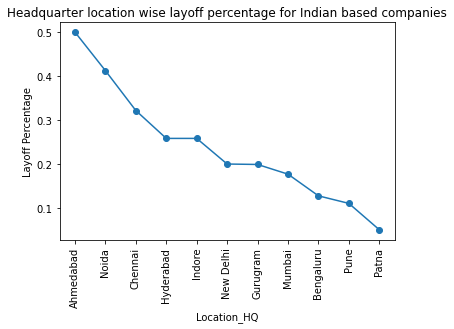

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Ahmedabad', 'Noida', 'Chennai', 'Hyderabad', 'Indore', 'New Delhi', 'Gurugram', 'Mumbai', 'Bengaluru', 'Pune', 'Patna'], 
        'Layoff_Percentage': [0.5, 0.412275, 0.321429, 0.257984, 0.257984, 0.199639, 0.198658, 0.176558, 0.127207, 0.11, 0.05]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Indian based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# For Netherlands:

In [56]:
# finding employee and layoff count (headquarter location wise) in Netherlands:

employee_count_by_location_Netherlands = Netherlands_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_Netherlands = Netherlands_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [57]:
# Sorting employee count (headquarter location wise) for Netherland based companies in descending order:
employee_count_by_location_Netherlands = employee_count_by_location_Netherlands.sort_values(ascending=False)
employee_count_by_location_Netherlands

Location_HQ
Amsterdam    1.672803e+07
The Hague    3.100970e+04
Name: employee_count, dtype: float64

In [58]:
# Sorting layoff count (headquarter location wise) for Netherland based companies in descending order:
laid_off_count_by_location_Netherlands = laid_off_count_by_location_Netherlands.sort_values(ascending=False)
laid_off_count_by_location_Netherlands

Location_HQ
Amsterdam    18157.597633
The Hague       80.000000
Name: Laid_Off_Count, dtype: float64

In [59]:
# finding the layoff percentage for every headquarter location for Netherland based companies and sorting it in descending order:
location_wise_layoff_percentage_Netherlands = ((laid_off_count_by_location_Netherlands)/(employee_count_by_location_Netherlands))*100
location_wise_layoff_percentage_Netherlands = location_wise_layoff_percentage_Netherlands.sort_values(ascending=False)
location_wise_layoff_percentage_Netherlands

Location_HQ
The Hague    0.257984
Amsterdam    0.108546
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Netherland based companies:

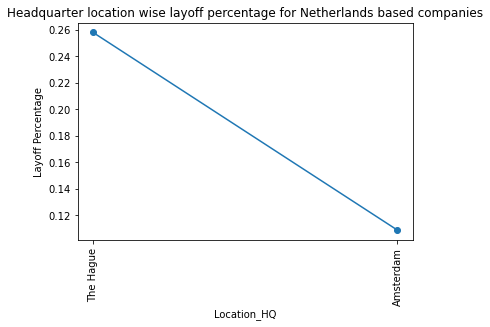

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['The Hague', 'Amsterdam'], 
        'Layoff_Percentage': [0.257984, 0.108546]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Netherlands based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# For United Kingdom:

In [61]:
# finding employee and layoff count (headquarter location wise) in United Kingdom:

employee_count_by_location_United_Kingdom = United_Kingdom_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_United_Kingdom = United_Kingdom_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [62]:
# Sorting employee count (headquarter location wise) for United Kingdom based companies in descending order:
employee_count_by_location_United_Kingdom = employee_count_by_location_United_Kingdom.sort_values(ascending=False)
employee_count_by_location_United_Kingdom

Location_HQ
London        7.926975e+06
Manchester    1.785714e+05
Edinburgh     1.500000e+05
Bristol       1.366106e+05
Chester       2.500000e+04
Name: employee_count, dtype: float64

In [63]:
# Sorting layoff count (headquarter location wise) for United Kingdom based companies in descending order:
laid_off_count_by_location_United_Kingdom = laid_off_count_by_location_United_Kingdom.sort_values(ascending=False)
laid_off_count_by_location_United_Kingdom

Location_HQ
London        15508.183432
Edinburgh       300.000000
Bristol         292.399408
Manchester      125.000000
Chester          40.000000
Name: Laid_Off_Count, dtype: float64

In [64]:
# finding the layoff percentage for every headquarter location for United Kingdom based companies and sorting it in descending order:
location_wise_layoff_percentage_United_Kingdom = ((laid_off_count_by_location_United_Kingdom)/(employee_count_by_location_United_Kingdom))*100
location_wise_layoff_percentage_United_Kingdom = location_wise_layoff_percentage_United_Kingdom.sort_values(ascending=False)
location_wise_layoff_percentage_United_Kingdom

Location_HQ
Bristol       0.214039
Edinburgh     0.200000
London        0.195638
Chester       0.160000
Manchester    0.070000
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for United Kingdom based companies:

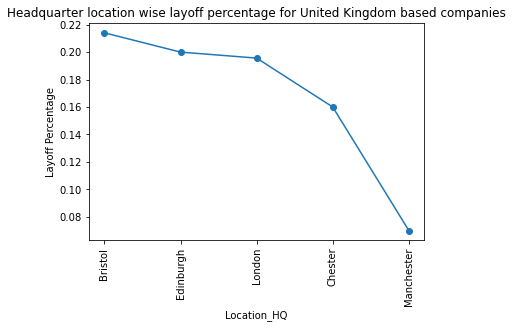

In [65]:
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Bristol', 'Edinburgh', 'London', 'Chester', 'Manchester'], 
        'Layoff_Percentage': [0.214039, 0.2, 0.195638, 0.16, 0.07]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for United Kingdom based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()

# For Brazil:

In [66]:
# finding employee and layoff count (headquarter location wise) in Brazil:

employee_count_by_location_Brazil = Brazil_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_Brazil = Brazil_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [67]:
# Sorting employee count (headquarter location wise) for United Kingdom based companies in descending order:
employee_count_by_location_Brazil = employee_count_by_location_Brazil.sort_values(ascending=False)
employee_count_by_location_Brazil

Location_HQ
Sao Paulo         8.585538e+06
Curitiba          7.433318e+05
Belo Horizonte    2.789286e+05
Joinville         5.275000e+04
Florianópolis     3.888889e+04
Blumenau          3.258106e+04
Brasilia          3.000000e+04
Porto Alegre      1.938106e+04
Name: employee_count, dtype: float64

In [68]:
# Sorting layoff count (headquarter location wise) for Brazil based companies in descending order:
laid_off_count_by_location_Brazil = laid_off_count_by_location_Brazil.sort_values(ascending=False)
laid_off_count_by_location_Brazil

Location_HQ
Sao Paulo         10761.795858
Curitiba           1225.198225
Belo Horizonte      494.000000
Joinville           191.000000
Blumenau             83.000000
Florianópolis        70.000000
Brasilia             60.000000
Porto Alegre         50.000000
Name: Laid_Off_Count, dtype: float64

In [69]:
# finding the layoff percentage for every headquarter location for Brazil based companies and sorting it in descending order:
location_wise_layoff_percentage_Brazil = ((laid_off_count_by_location_Brazil)/(employee_count_by_location_Brazil))*100
location_wise_layoff_percentage_Brazil = location_wise_layoff_percentage_Brazil.sort_values(ascending=False)
location_wise_layoff_percentage_Brazil

Location_HQ
Joinville         0.362085
Porto Alegre      0.257984
Blumenau          0.254749
Brasilia          0.200000
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.164825
Sao Paulo         0.125348
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Brazil based companies:

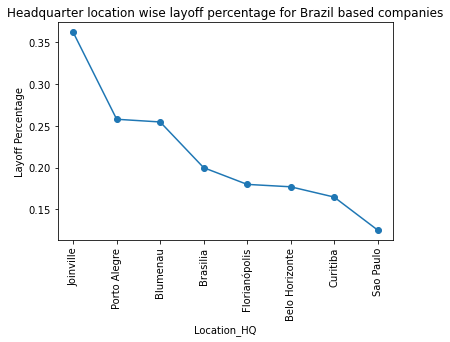

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Joinville', 'Porto Alegre', 'Blumenau', 'Brasilia', 'Florianópolis', 'Belo Horizonte', 'Curitiba', 'Sao Paulo'], 
        'Layoff_Percentage': [0.362085, 0.257984, 0.254749, 0.2, 0.18, 0.177106, 0.164825, 0.125348]}

# Convert the data to a DataFrame and rename it
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Brazil based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# Now we'll be seeing which companies have benefitted from layoffs.We have got a column in our dataset which talks about the funds raised by a company by laying off employees.Secondly,we can calculate the percentage of employees every company had laid off in order to raise those funds(we already have this information in the original dataset).Based on these 2 things,we can find which companies benefitted the most and which companies benefitted the least:

In [71]:
# First we create a benefit column and store the information in a separate dataset containing all other info of original dataset also.

dataset_copy_2 = dataset_copy
dataset_copy_2['Benefit'] = dataset['Funds_Raised']/dataset['Percentage']
dataset_copy_2.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
0,Dunzo,Bengaluru,Food,300.000000,0.300000,2023-04-05,382.000000,Unknown,India,100000.000000,1273.333333
1,Amplitude,SF Bay Area,Data,99.000000,0.130000,2023-04-05,311.000000,Post-IPO,United States,76153.846154,2392.307692
2,1K Kirana,Gurugram,Retail,600.000000,0.400000,2023-04-04,823.746888,Series B,India,150000.000000,2059.367221
3,Boost,New York City,Finance,15.000000,0.200000,2023-04-04,37.000000,Series B,United States,7500.000000,185.000000
4,Cin7,Auckland,Retail,254.399408,0.257984,2023-04-04,823.746888,Private Equity,New Zealand,98610.605337,3193.017620


In [72]:
# The columns of use from the dataset we just created are Company & Benefit because we have to find out the benefit for
# every company,so we extract the useful columns and store it in separate dataframe.

company_benefit = dataset_copy_2.loc[:,['Company','Benefit']]
company_benefit

,Company,Benefit
0,Dunzo,1273.333333
1,Amplitude,2392.307692
2,1K Kirana,2059.367221
3,Boost,185.000000
4,Cin7,3193.017620
...,...,...
2463,HopSkipDrive,450.000000
2464,Panda Squad,1.333333
2465,Tamara Mellon,225.000000
2466,EasyPost,46.514545


In [73]:
# In the dataset we have multiple instances of same company becuse there is a date column which indicates the percentage of
# employees laid off on a particular date in that company.So the benefit of the company across different dates will be
# different.To find the benefit of the companies we'll have to find the average of all these benefits.

average_benefit_by_company = company_benefit.groupby('Company')['Benefit'].mean()
print(average_benefit_by_company)

Company
 E Inc.              3193.017620
 Included Health     4533.333333
#Paid                 123.529412
&Open                 388.888889
100 Thieves           465.145447
                        ...     
iRobot                364.285714
kununu               3193.017620
nCino               15714.285714
tZero                1829.572090
uShip                 186.486486
Name: Benefit, Length: 1970, dtype: float64


In [74]:
# Finally to find out which company profited the most we'll have to sort the average_benefit_by_company dataset in descending
# order

average_benefit_by_company = average_benefit_by_company.sort_values(ascending=False)
average_benefit_by_company

Company
TaskUs                    inf
Netflix          4.299588e+06
Tesla            2.020000e+05
Grab             1.980000e+05
Rivian           1.705556e+05
                     ...     
BitMEX           0.000000e+00
Drip             0.000000e+00
SuperLearn       0.000000e+00
Tuft & Needle    0.000000e+00
Chessable        0.000000e+00
Name: Benefit, Length: 1970, dtype: float64

# Let's represent the profit of the top five most profitable companies on a bar graph:

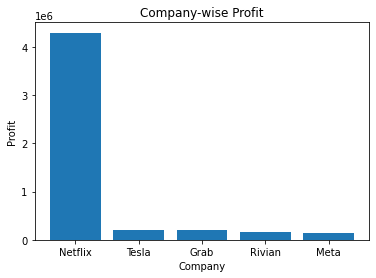

In [75]:
import matplotlib.pyplot as plt

# Data
companies = ['Netflix', 'Tesla', 'Grab', 'Rivian', 'Meta']
profits = [4299588, 202000, 198000, 170556, 150390]

# Bar graph
plt.bar(companies, profits)

# X-axis label
plt.xlabel('Company')

# Y-axis label
plt.ylabel('Profit')

# Title
plt.title('Company-wise Profit')

# Show the plot
plt.show()

# We see that Netflix has benefitted significantly from layoffs compared to the other four companies.So,let's create a heatmap in order to understand the benefit of Netflix across different days:

<AxesSubplot:xlabel='Date', ylabel='Location_HQ'>

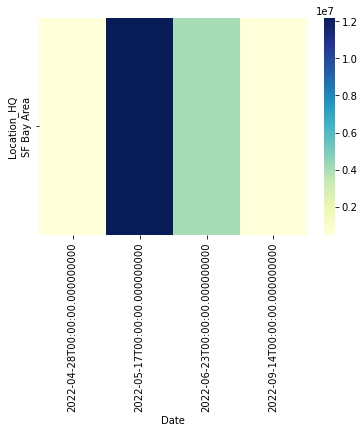

In [76]:
import pandas as pd
import seaborn as sns

# Filter the dataset for Netflix
netflix_df = dataset_copy_2[dataset_copy_2['Company'] == 'Netflix']

# Pivot the dataframe
netflix_pivot = netflix_df.pivot(index='Location_HQ', columns='Date', values='Benefit')

# Create the heatmap
sns.heatmap(netflix_pivot, cmap='YlGnBu')


In [77]:
print(dataset_copy_2[dataset_copy_2['Company']=='Netflix'])


      Company  Location_HQ Industry  Laid_Off_Count  Percentage       Date  \
1084  Netflix  SF Bay Area    Media            30.0    0.257984 2022-09-14   
1504  Netflix  SF Bay Area    Media           300.0    0.030000 2022-06-23   
1693  Netflix  SF Bay Area    Media           150.0    0.010000 2022-05-17   
1728  Netflix  SF Bay Area    Media            25.0    0.257984 2022-04-28   

      Funds_Raised     Stage        Country  employee_count       Benefit  
1084      121900.0  Post-IPO  United States    1.162864e+04  4.725102e+05  
1504      121900.0  Post-IPO  United States    1.000000e+06  4.063333e+06  
1693      121900.0  Post-IPO  United States    1.500000e+06  1.219000e+07  
1728      121900.0  Post-IPO  United States    9.690530e+03  4.725102e+05  


# Extracting the overall results obtained by analysis in separate csv's:

In [78]:
industry_wise_layoff_percentage_USA_top_five = industry_wise_layoff_percentage_USA[:5]
industry_wise_layoff_percentage_USA_top_five

Industry
Energy           0.260302
Travel           0.244248
Aerospace        0.231316
Education        0.222929
Manufacturing    0.211887
dtype: float64

In [79]:
file_path = r'C:\Recession_Analysis_Dataset\USA_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_USA_top_five.to_csv(file_path,index=True)

In [80]:
industry_wise_layoff_percentage_USA_bottom_five = industry_wise_layoff_percentage_USA[25:]
industry_wise_layoff_percentage_USA_bottom_five

Industry
Logistics    0.081074
Retail       0.057571
Sales        0.051312
Hardware     0.050278
Support           NaN
dtype: float64

In [81]:
industry_wise_layoff_percentage_USA_bottom_five['Support'] = 0
industry_wise_layoff_percentage_USA_bottom_five

Industry
Logistics    0.081074
Retail       0.057571
Sales        0.051312
Hardware     0.050278
Support      0.000000
dtype: float64

In [82]:
file_path = r'C:\Recession_Analysis_Dataset\USA_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_USA_bottom_five.to_csv(file_path,index=True)

In [83]:
location_wise_layoff_percentage_USA_top_five = location_wise_layoff_percentage_USA[:5]
location_wise_layoff_percentage_USA_top_five

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
dtype: float64

In [84]:
file_path = r'C:\Recession_Analysis_Dataset\USA_location_wise_layoff_percentage_top_five.csv'
location_wise_layoff_percentage_USA_top_five.to_csv(file_path,index=True)

In [85]:
len(location_wise_layoff_percentage_USA)

96

In [86]:
location_wise_layoff_percentage_USA_bottom_five = location_wise_layoff_percentage_USA[91:]
location_wise_layoff_percentage_USA_bottom_five

Location_HQ
Boise          0.078117
St. Louis      0.070178
Seattle        0.048049
Kansas City    0.020000
Los Angeles         NaN
dtype: float64

In [87]:
location_wise_layoff_percentage_USA_bottom_five['Los Angeles'] = 0
location_wise_layoff_percentage_USA_bottom_five

Location_HQ
Boise          0.078117
St. Louis      0.070178
Seattle        0.048049
Kansas City    0.020000
Los Angeles    0.000000
dtype: float64

In [88]:
file_path = r'C:\Recession_Analysis_Dataset\USA_location_wise_layoff_percentage_bottom_five.csv'
location_wise_layoff_percentage_USA_bottom_five.to_csv(file_path,index=True)

In [89]:
industry_wise_layoff_percentage_India

Industry
Construction      0.500000
Crypto            0.407082
Recruiting        0.400000
Finance           0.314767
Other             0.273294
Logistics         0.271989
Data              0.257984
Marketing         0.246938
Healthcare        0.244334
Real Estate       0.238249
HR                0.235249
Consumer          0.230321
Transportation    0.196448
Travel            0.189791
Support           0.184569
Retail            0.177234
Fitness           0.174070
Media             0.131542
Education         0.114536
Food              0.078467
dtype: float64

In [90]:
industry_wise_layoff_percentage_India_top_five = industry_wise_layoff_percentage_India[:5]
industry_wise_layoff_percentage_India_top_five

Industry
Construction    0.500000
Crypto          0.407082
Recruiting      0.400000
Finance         0.314767
Other           0.273294
dtype: float64

In [91]:
file_path = r'C:\Recession_Analysis_Dataset\India_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_India_top_five.to_csv(file_path,index=True)

In [92]:
len(industry_wise_layoff_percentage_India)

20

In [93]:
industry_wise_layoff_percentage_India_bottom_five = industry_wise_layoff_percentage_India[15:]
industry_wise_layoff_percentage_India_bottom_five

Industry
Retail       0.177234
Fitness      0.174070
Media        0.131542
Education    0.114536
Food         0.078467
dtype: float64

In [94]:
file_path = r'C:\Recession_Analysis_Dataset\India_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_India_bottom_five.to_csv(file_path,index=True)

In [95]:
location_wise_layoff_percentage_India

Location_HQ
Ahmedabad    0.500000
Noida        0.412275
Chennai      0.321429
Hyderabad    0.257984
Indore       0.257984
New Delhi    0.199639
Gurugram     0.198658
Mumbai       0.176558
Bengaluru    0.127207
Pune         0.110000
Patna        0.050000
dtype: float64

In [96]:
location_wise_layoff_percentage_India_top_five = location_wise_layoff_percentage_India[:5]
location_wise_layoff_percentage_India_top_five

Location_HQ
Ahmedabad    0.500000
Noida        0.412275
Chennai      0.321429
Hyderabad    0.257984
Indore       0.257984
dtype: float64

In [97]:
file_path = r'C:\Recession_Analysis_Dataset\India_location_wise_layoff_percentage_top_five.csv'
location_wise_layoff_percentage_India_top_five.to_csv(file_path,index=True)

In [98]:
location_wise_layoff_percentage_India_bottom_five = location_wise_layoff_percentage_India[6:]
location_wise_layoff_percentage_India_bottom_five

Location_HQ
Gurugram     0.198658
Mumbai       0.176558
Bengaluru    0.127207
Pune         0.110000
Patna        0.050000
dtype: float64

In [99]:
file_path = r'C:\Recession_Analysis_Dataset\India_location_wise_layoff_percentage_bottom_five.csv'
location_wise_layoff_percentage_India_bottom_five.to_csv(file_path,index=True)

In [100]:
industry_wise_layoff_percentage_Netherlands

Industry
Other             0.297563
Food              0.257984
Travel            0.250000
Marketing         0.150000
Finance           0.144915
Transportation    0.122881
Healthcare        0.079268
dtype: float64

In [101]:
industry_wise_layoff_percentage_Netherlands_top_three = industry_wise_layoff_percentage_Netherlands[:3]
industry_wise_layoff_percentage_Netherlands_top_three

Industry
Other     0.297563
Food      0.257984
Travel    0.250000
dtype: float64

In [102]:
file_path = r'C:\Recession_Analysis_Dataset\Netherlands_industry_wise_layoff_percentage_top_three.csv'
industry_wise_layoff_percentage_Netherlands_top_three.to_csv(file_path,index=True)

In [103]:
industry_wise_layoff_percentage_Netherlands_bottom_three = industry_wise_layoff_percentage_Netherlands[4:]
industry_wise_layoff_percentage_Netherlands_bottom_three

Industry
Finance           0.144915
Transportation    0.122881
Healthcare        0.079268
dtype: float64

In [104]:
file_path = r'C:\Recession_Analysis_Dataset\Netherlands_industry_wise_layoff_percentage_bottom_three.csv'
industry_wise_layoff_percentage_Netherlands_bottom_three.to_csv(file_path,index=True)

In [105]:
location_wise_layoff_percentage_Netherlands

Location_HQ
The Hague    0.257984
Amsterdam    0.108546
dtype: float64

In [106]:
file_path = r'C:\Recession_Analysis_Dataset\Netherlands_location_wise_layoff_percentage.csv'
location_wise_layoff_percentage_Netherlands.to_csv(file_path,index=True)

In [107]:
industry_wise_layoff_percentage_United_Kingdom

Industry
Product           1.000000
Aerospace         0.850000
Marketing         0.415105
Retail            0.338853
Crypto            0.284707
Healthcare        0.271615
Energy            0.257984
Education         0.257984
Real Estate       0.257984
Data              0.257984
Travel            0.250018
Transportation    0.224581
Media             0.175608
Food              0.174044
Other             0.166679
Finance           0.158490
HR                0.135803
Security          0.078461
Consumer          0.030240
dtype: float64

In [108]:
industry_wise_layoff_percentage_United_Kingdom_top_five = industry_wise_layoff_percentage_United_Kingdom[:5]
industry_wise_layoff_percentage_United_Kingdom_top_five

Industry
Product      1.000000
Aerospace    0.850000
Marketing    0.415105
Retail       0.338853
Crypto       0.284707
dtype: float64

In [109]:
file_path = r'C:\Recession_Analysis_Dataset\United_Kingdom_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_United_Kingdom_top_five.to_csv(file_path,index=True)

In [110]:
len(industry_wise_layoff_percentage_United_Kingdom)

19

In [111]:
industry_wise_layoff_percentage_United_Kingdom_bottom_five = industry_wise_layoff_percentage_United_Kingdom[14:]
industry_wise_layoff_percentage_United_Kingdom_bottom_five

Industry
Other       0.166679
Finance     0.158490
HR          0.135803
Security    0.078461
Consumer    0.030240
dtype: float64

In [112]:
file_path = r'C:\Recession_Analysis_Dataset\United_Kingdom_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_United_Kingdom_bottom_five.to_csv(file_path,index=True)

In [113]:
location_wise_layoff_percentage_United_Kingdom

Location_HQ
Bristol       0.214039
Edinburgh     0.200000
London        0.195638
Chester       0.160000
Manchester    0.070000
dtype: float64

In [114]:
file_path = r'C:\Recession_Analysis_Dataset\United_Kingdom_location_wise_layoff_percentage.csv'
location_wise_layoff_percentage_United_Kingdom.to_csv(file_path,index=True)

In [115]:
industry_wise_layoff_percentage_Brazil

Industry
Sales             0.400000
Fitness           0.330000
Travel            0.285564
HR                0.257984
Support           0.250000
Education         0.218535
Consumer          0.195509
Healthcare        0.177668
Retail            0.162380
Recruiting        0.160000
Marketing         0.136725
Crypto            0.134118
Finance           0.128575
Transportation    0.114968
Real Estate       0.106476
Logistics         0.105000
Other             0.099134
Food              0.090773
dtype: float64

In [116]:
industry_wise_layoff_percentage_Brazil_top_five = industry_wise_layoff_percentage_Brazil[:5]
industry_wise_layoff_percentage_Brazil_top_five

Industry
Sales      0.400000
Fitness    0.330000
Travel     0.285564
HR         0.257984
Support    0.250000
dtype: float64

In [117]:
file_path = r'C:\Recession_Analysis_Dataset\Brazil_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_Brazil_top_five.to_csv(file_path,index=True)

In [118]:
len(industry_wise_layoff_percentage_Brazil)

18

In [119]:
industry_wise_layoff_percentage_Brazil_bottom_five = industry_wise_layoff_percentage_Brazil[13:]
industry_wise_layoff_percentage_Brazil_bottom_five

Industry
Transportation    0.114968
Real Estate       0.106476
Logistics         0.105000
Other             0.099134
Food              0.090773
dtype: float64

In [120]:
file_path = r'C:\Recession_Analysis_Dataset\Brazil_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_Brazil_bottom_five.to_csv(file_path,index=True)

In [121]:
location_wise_layoff_percentage_Brazil

Location_HQ
Joinville         0.362085
Porto Alegre      0.257984
Blumenau          0.254749
Brasilia          0.200000
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.164825
Sao Paulo         0.125348
dtype: float64

In [122]:
location_wise_layoff_percentage_Brazil_top_four = location_wise_layoff_percentage_Brazil[:4]
location_wise_layoff_percentage_Brazil_top_four

Location_HQ
Joinville       0.362085
Porto Alegre    0.257984
Blumenau        0.254749
Brasilia        0.200000
dtype: float64

In [123]:
file_path = r'C:\Recession_Analysis_Dataset\Brazil_location_wise_layoff_percentage_top_four.csv'
location_wise_layoff_percentage_Brazil_top_four.to_csv(file_path,index=True)

In [124]:
location_wise_layoff_percentage_Brazil_bottom_four = location_wise_layoff_percentage_Brazil[4:]
location_wise_layoff_percentage_Brazil_bottom_four

Location_HQ
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.164825
Sao Paulo         0.125348
dtype: float64

In [125]:
file_path = r'C:\Recession_Analysis_Dataset\Brazil_location_wise_layoff_percentage_bottom_four.csv'
location_wise_layoff_percentage_Brazil_bottom_four.to_csv(file_path,index=True)

In [126]:
file_path = r'C:\Recession_Analysis_Dataset\Country_wise_laid_off_count_top_five.csv'
country_laid_off_counts_top_five.to_csv(file_path,index=True)

In [127]:
location_laid_off_counts_top_10 = location_laid_off_counts[:10]
location_laid_off_counts_top_10

Location_HQ
SF Bay Area      190592.488166
Seattle           52312.180473
New York City     49802.952663
Bengaluru         25565.192308
Boston            20946.576923
Amsterdam         18157.597633
Los Angeles       16332.177515
London            16258.982249
Austin            15269.390533
Stockholm         12249.597633
Name: Laid_Off_Count, dtype: float64

In [128]:
file_path = r'C:\Recession_Analysis_Dataset\Headquarter_Location_laid_off_count_top_10.csv'
location_laid_off_counts_top_10.to_csv(file_path,index=True)

In [129]:
industry_laid_off_counts_top_10 = industry_laid_off_counts[:10]
industry_laid_off_counts_top_10

Industry
Retail            70854.760355
Consumer          65045.979290
Finance           53048.346154
Other             50747.769231
Transportation    46659.976331
Healthcare        43636.961538
Food              37501.772189
Real Estate       29012.973373
Hardware          26988.795858
Travel            22246.988166
Name: Laid_Off_Count, dtype: float64

In [130]:
file_path = r'C:\Recession_Analysis_Dataset\Industry_laid_off_count_top_10.csv'
industry_laid_off_counts_top_10.to_csv(file_path,index=True)

In [131]:
Netflix_dataset = dataset_copy_2[dataset_copy_2['Company']=='Netflix']
Netflix_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1084,Netflix,SF Bay Area,Media,30.0,0.257984,2022-09-14,121900.0,Post-IPO,United States,1.162864e+04,4.725102e+05
1504,Netflix,SF Bay Area,Media,300.0,0.030000,2022-06-23,121900.0,Post-IPO,United States,1.000000e+06,4.063333e+06
1693,Netflix,SF Bay Area,Media,150.0,0.010000,2022-05-17,121900.0,Post-IPO,United States,1.500000e+06,1.219000e+07
1728,Netflix,SF Bay Area,Media,25.0,0.257984,2022-04-28,121900.0,Post-IPO,United States,9.690530e+03,4.725102e+05


In [132]:
Tesla_dataset = dataset_copy_2[dataset_copy_2['Company']=='Tesla']
Tesla_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1623,Tesla,Austin,Transportation,254.399408,0.1,2022-06-03,20200.0,Post-IPO,United States,254399.408284,202000.0


In [133]:
Grab_Company_dataset = dataset_copy_2[dataset_copy_2['Company']=='Grab']
Grab_Company_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1939,Grab,Singapore,Transportation,360.0,0.05,2020-06-16,9900.0,Series I,Singapore,720000.0,198000.0


In [134]:
average_benefit_by_company_top_five = average_benefit_by_company[1:6]
average_benefit_by_company_top_five

Company
Netflix    4.299588e+06
Tesla      2.020000e+05
Grab       1.980000e+05
Rivian     1.705556e+05
Meta       1.503908e+05
Name: Benefit, dtype: float64

In [135]:
file_path = r'C:\Recession_Analysis_Dataset\average_benefit_by_company_top_five.csv'
average_benefit_by_company_top_five.to_csv(file_path,index=True)

In [143]:
print(country_laid_off_counts[:5].sum())

523897.44082840235


In [144]:
print(industry_laid_off_counts[:5].sum())

286356.83136094676


In [145]:
print(location_laid_off_counts[:5].sum())

339219.3905325444


In [146]:
location_laid_off_counts[:5]

Location_HQ
SF Bay Area      190592.488166
Seattle           52312.180473
New York City     49802.952663
Bengaluru         25565.192308
Boston            20946.576923
Name: Laid_Off_Count, dtype: float64

In [147]:
industry_laid_off_counts[:5]

Industry
Retail            70854.760355
Consumer          65045.979290
Finance           53048.346154
Other             50747.769231
Transportation    46659.976331
Name: Laid_Off_Count, dtype: float64

In [148]:
country_laid_off_counts[:5]

Country
United States     432889.680473
India              43569.585799
Netherlands        18237.597633
United Kingdom     16265.582840
Brazil             12934.994083
Name: Laid_Off_Count, dtype: float64